In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [3]:
sns.set(rc={'figure.figsize':(50,50)})
sns.set_style('whitegrid')

In [5]:
ps = pd.read_csv('vasan_spike_CA_only.pdb', delim_whitespace=True)

In [7]:
from proteingraph import read_pdb

p = read_pdb('6vxx.pdb')

In [8]:
p

In [6]:
ps.head()

CRYST1 160.000 160.000.1  198.248   90.00  90.00.1  90.00.2    P  \
ATOM 1.0     CA     ALA         A     27.0 -40.708   39.016   17.777  1.0   
     2.0     CA     TYR         A     28.0 -38.170   37.168   15.487  1.0   
     3.0     CA     THR         A     29.0 -35.589   38.277   12.971  1.0   
     4.0     CA     ASN         A     30.0 -32.950   36.855   10.583  1.0   
     5.0     CA     SER         A     31.0 -29.454   36.557   12.048  1.0   

             1 1.1  
ATOM 1.0  1.00   A  
     2.0  1.00   A  
     3.0  1.00   A  
     4.0  1.00   A  
     5.0  1.00   A

In [8]:
data = pd.read_csv('vasan_CAonly_Cchain.txt', delim_whitespace=True)

In [9]:
data.head()

,Node,Degree,Cluster_Coeff,Closeness,Betweenness,Eigenvector,centrality,Eccentricity,Average,neighbor,degree
0,C27,5,0.700000,0.054222,0.000156,0.0,37,7.800000,NaN,NaN,NaN
1,C28,6,0.733333,0.056463,0.001161,0.0,36,8.500000,NaN,NaN,NaN
2,C29,8,0.500000,0.059203,0.031677,0.0,35,8.125000,NaN,NaN,NaN
3,C30,7,0.666667,0.059019,0.000295,0.0,35,8.571428,NaN,NaN,NaN
4,C31,10,0.488889,0.061985,0.116040,0.0,34,8.200000,NaN,NaN,NaN


In [10]:
data.dtypes

Node              object
Degree             int64
Cluster_Coeff    float64
Closeness        float64
Betweenness      float64
Eigenvector      float64
centrality         int64
Eccentricity     float64
Average          float64
neighbor         float64
degree           float64
dtype: object

In [11]:
data['Node'] = data['Node'].astype('str').str[1:]

In [12]:
data['Node'] = data['Node'].astype('int64')

In [39]:
data.index = data['Node']

In [40]:
data.head()

,Node,Degree,Cluster_Coeff,Closeness,Betweenness,Eigenvector,centrality,Eccentricity,Average,neighbor,degree
Node,,,,,,,,,,,
27,27,5,0.700000,0.054222,0.000156,0.0,37,7.800000,NaN,NaN,NaN
28,28,6,0.733333,0.056463,0.001161,0.0,36,8.500000,NaN,NaN,NaN
29,29,8,0.500000,0.059203,0.031677,0.0,35,8.125000,NaN,NaN,NaN
30,30,7,0.666667,0.059019,0.000295,0.0,35,8.571428,NaN,NaN,NaN
31,31,10,0.488889,0.061985,0.116040,0.0,34,8.200000,NaN,NaN,NaN


In [69]:
data2 = data.drop(columns=['Node', 'Average', 'neighbor', 'degree'], axis=1)

In [79]:
data2

,Degree,Cluster_Coeff,Closeness,Betweenness,Eigenvector,centrality,Eccentricity
Node,,,,,,,
27,5,0.700000,0.054222,0.000156,0.000000,37,7.800000
28,6,0.733333,0.056463,0.001161,0.000000,36,8.500000
29,8,0.500000,0.059203,0.031677,0.000000,35,8.125000
30,7,0.666667,0.059019,0.000295,0.000000,35,8.571428
31,10,0.488889,0.061985,0.116040,0.000000,34,8.200000
...,...,...,...,...,...,...,...
1143,5,0.900000,0.047992,0.000001,0.000146,38,6.000000
1144,5,0.900000,0.047992,0.000001,0.000146,38,6.000000
1145,6,0.666667,0.047995,0.001912,0.000149,38,5.166667


In [89]:
scaler = MinMaxScaler()
data2scaled = pd.DataFrame(scaler.fit_transform(data2), columns=data2.columns)

In [90]:
data2scaled.index = data2scaled.index+27

In [91]:
data2_scaled_crop = data2scaled.iloc[400:700]

In [92]:
data2_scaled_crop

,Degree,Cluster_Coeff,Closeness,Betweenness,Eigenvector,centrality,Eccentricity
427,0.363636,0.520000,0.263268,0.003427,0.000000,0.72,0.412229
428,0.181818,0.600000,0.309961,0.011775,0.000000,0.68,0.520710
429,0.636364,0.300000,0.313215,0.078513,0.000000,0.68,0.470085
430,0.545455,0.357143,0.361897,0.056055,0.000000,0.64,0.585799
431,0.727273,0.360000,0.365125,0.042773,0.000000,0.64,0.676923
...,...,...,...,...,...,...,...
722,0.636364,0.300000,0.561478,0.050061,0.498694,0.48,0.817226
723,0.363636,0.520000,0.564474,0.271250,0.397979,0.48,0.781065
724,0.545455,0.528571,0.515534,0.039797,0.595185,0.52,0.748521
725,0.454545,0.542857,0.520777,0.241602,0.551041,0.52,0.715976


In [ ]:
hm = sns.heatmap(data2_scaled_crop)
figure = hm.get_figure()    
figure.savefig('heatmap_scaled.png', dpi=400)

In [14]:
data.describe()

,Node,Degree,Cluster_Coeff,Closeness,Betweenness,Eigenvector,centrality,Eccentricity,Average,neighbor,degree
count,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,0.0,0.0,0.0
mean,587.000000,7.289920,0.533127,0.052243,0.034784,0.063147,38.861731,7.669678,NaN,NaN,NaN
std,323.749131,2.262421,0.134426,0.008813,0.103571,0.165032,5.264908,1.519446,NaN,NaN,NaN
min,27.000000,2.000000,0.166667,0.035002,0.000000,0.000000,25.000000,3.500000,NaN,NaN,NaN
25%,307.000000,6.000000,0.444444,0.045696,0.001703,0.000000,35.000000,6.714286,NaN,NaN,NaN
50%,587.000000,7.000000,0.500000,0.051435,0.007019,0.000000,39.000000,8.000000,NaN,NaN,NaN
75%,867.000000,9.000000,0.619048,0.057581,0.021387,0.020267,43.000000,8.750000,NaN,NaN,NaN
max,1147.000000,13.000000,1.000000,0.073723,1.000000,1.000000,50.000000,11.181818,NaN,NaN,NaN


In [24]:
data.iloc[474]

Node             501.000000
Degree             7.000000
Cluster_Coeff      0.523810
Closeness          0.040602
Betweenness        0.001173
Eigenvector        0.000000
centrality        46.000000
Eccentricity       7.571429
Average                 NaN
neighbor                NaN
degree                  NaN
Name: 474, dtype: float64

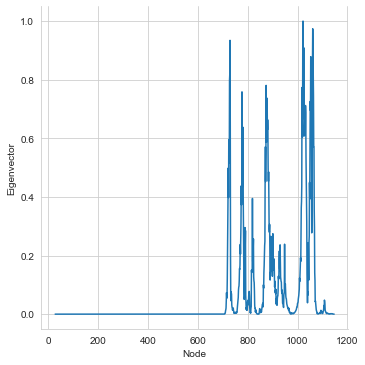

In [15]:
sns.relplot(x='Node', y='Eigenvector',kind='line', data=data)

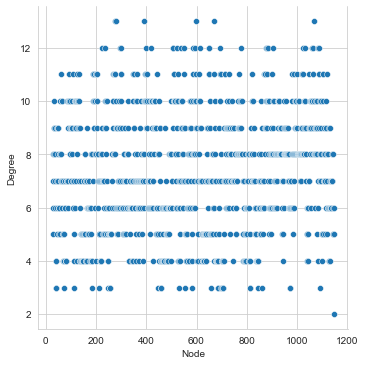

In [16]:
sns.relplot(x='Node', y='Degree', data=data)

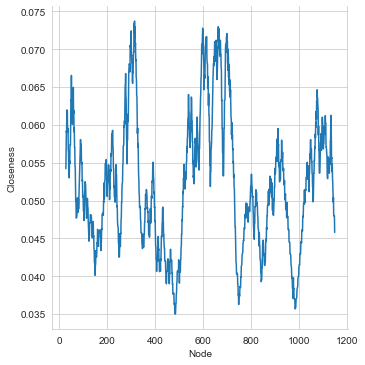

In [17]:
sns.relplot(x='Node', y='Closeness', kind='line',data=data)

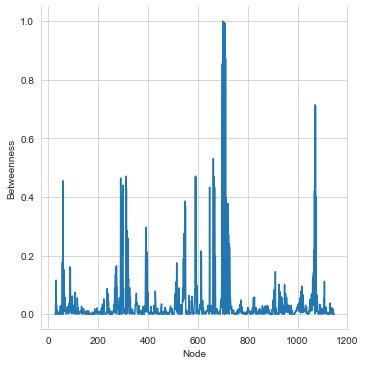

In [18]:
sns.relplot(x='Node', y='Betweenness',kind='line', data=data)

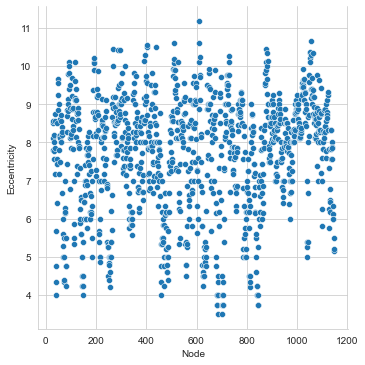

In [19]:
sns.relplot(x='Node', y='Eccentricity', data=data)

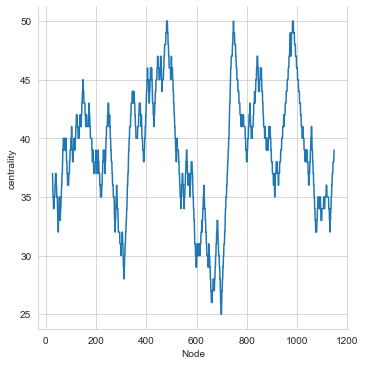

In [20]:
sns.relplot(x='Node', y='centrality',kind='line', data=data)

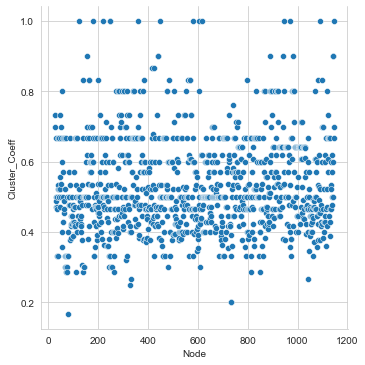

In [21]:
sns.relplot(x='Node', y='Cluster_Coeff', data=data)